<a href="https://colab.research.google.com/github/RamPrakash-98/Sentiment-Analysis/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

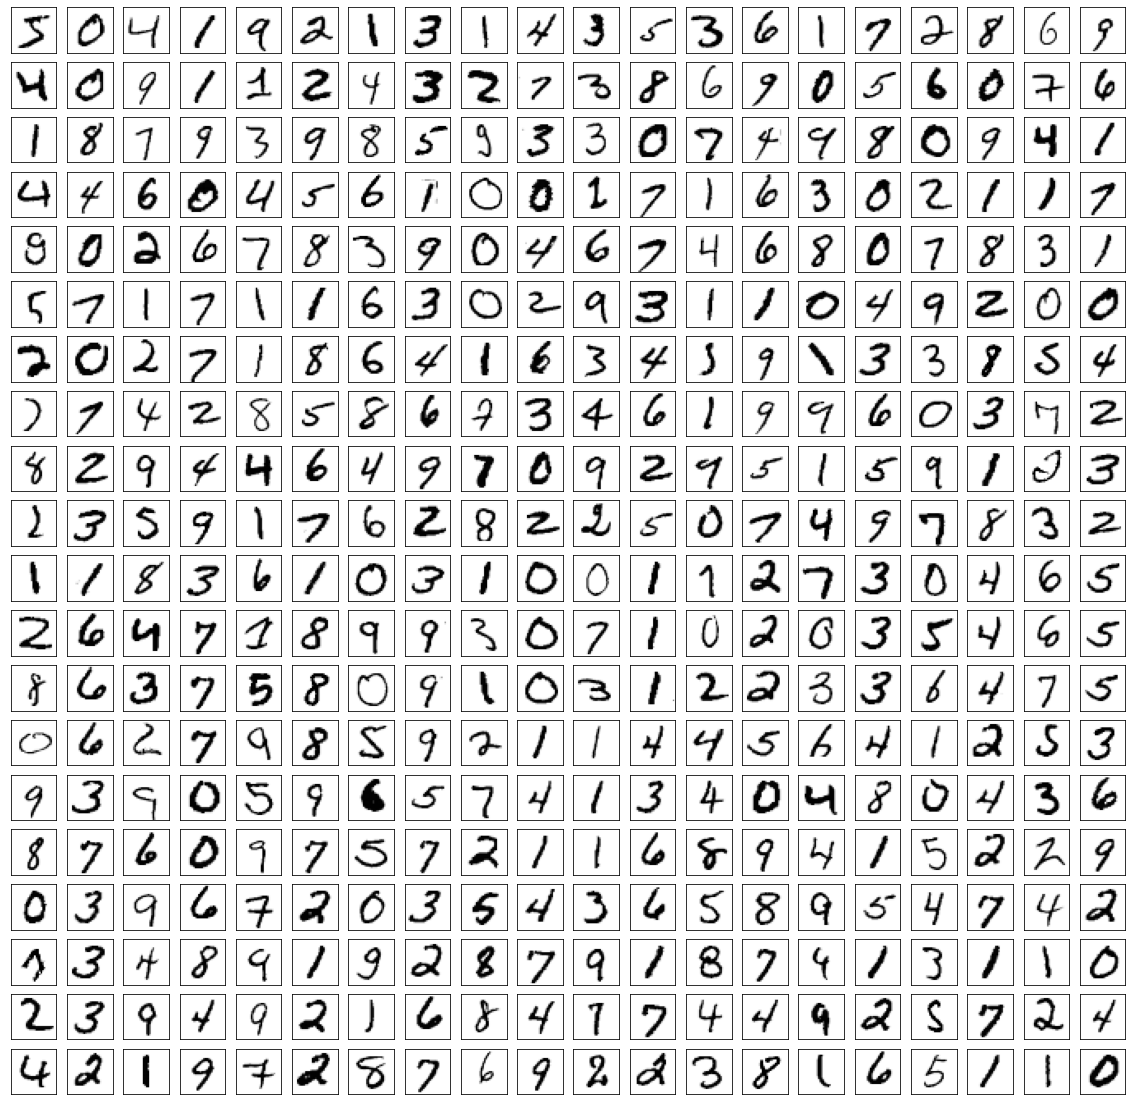

In [11]:
plt.figure(figsize=(20,20))
for i in range(400):
  plt.subplot(20,20,i+1)
  plt.imshow(X_train[i],cmap=plt.cm.Greys)
  plt.xticks([])
  plt.yticks([])

In [15]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [20]:
model=Sequential([Dense(1024,activation='relu',input_shape=(784,)),
                  Dense(128,activation='tanh'),
                  Dropout(rate=0.05),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')])

In [21]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
len(X_train)

60000

In [25]:
model.fit(x=X_train,y=to_categorical(y_train),epochs=10,batch_size=60,shuffle=True)

Epoch 1/10
1000/1000 [==============================] - 12s 10ms/step - loss: 0.3317 - accuracy: 0.9001
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0825 - accuracy: 0.9738
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0368 - accuracy: 0.9879
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0294 - accuracy: 0.9901
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 8/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 9/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0163 - accuracy: 0.9946
Epoch 10/10
1000/1000 [==============================] - 10s 10m

In [27]:
evaluation=model.evaluate(X_test,to_categorical(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9802


In [28]:
evaluation

[0.08450759947299957, 0.9801999926567078]

In [29]:
predictions=model.predict(X_test)

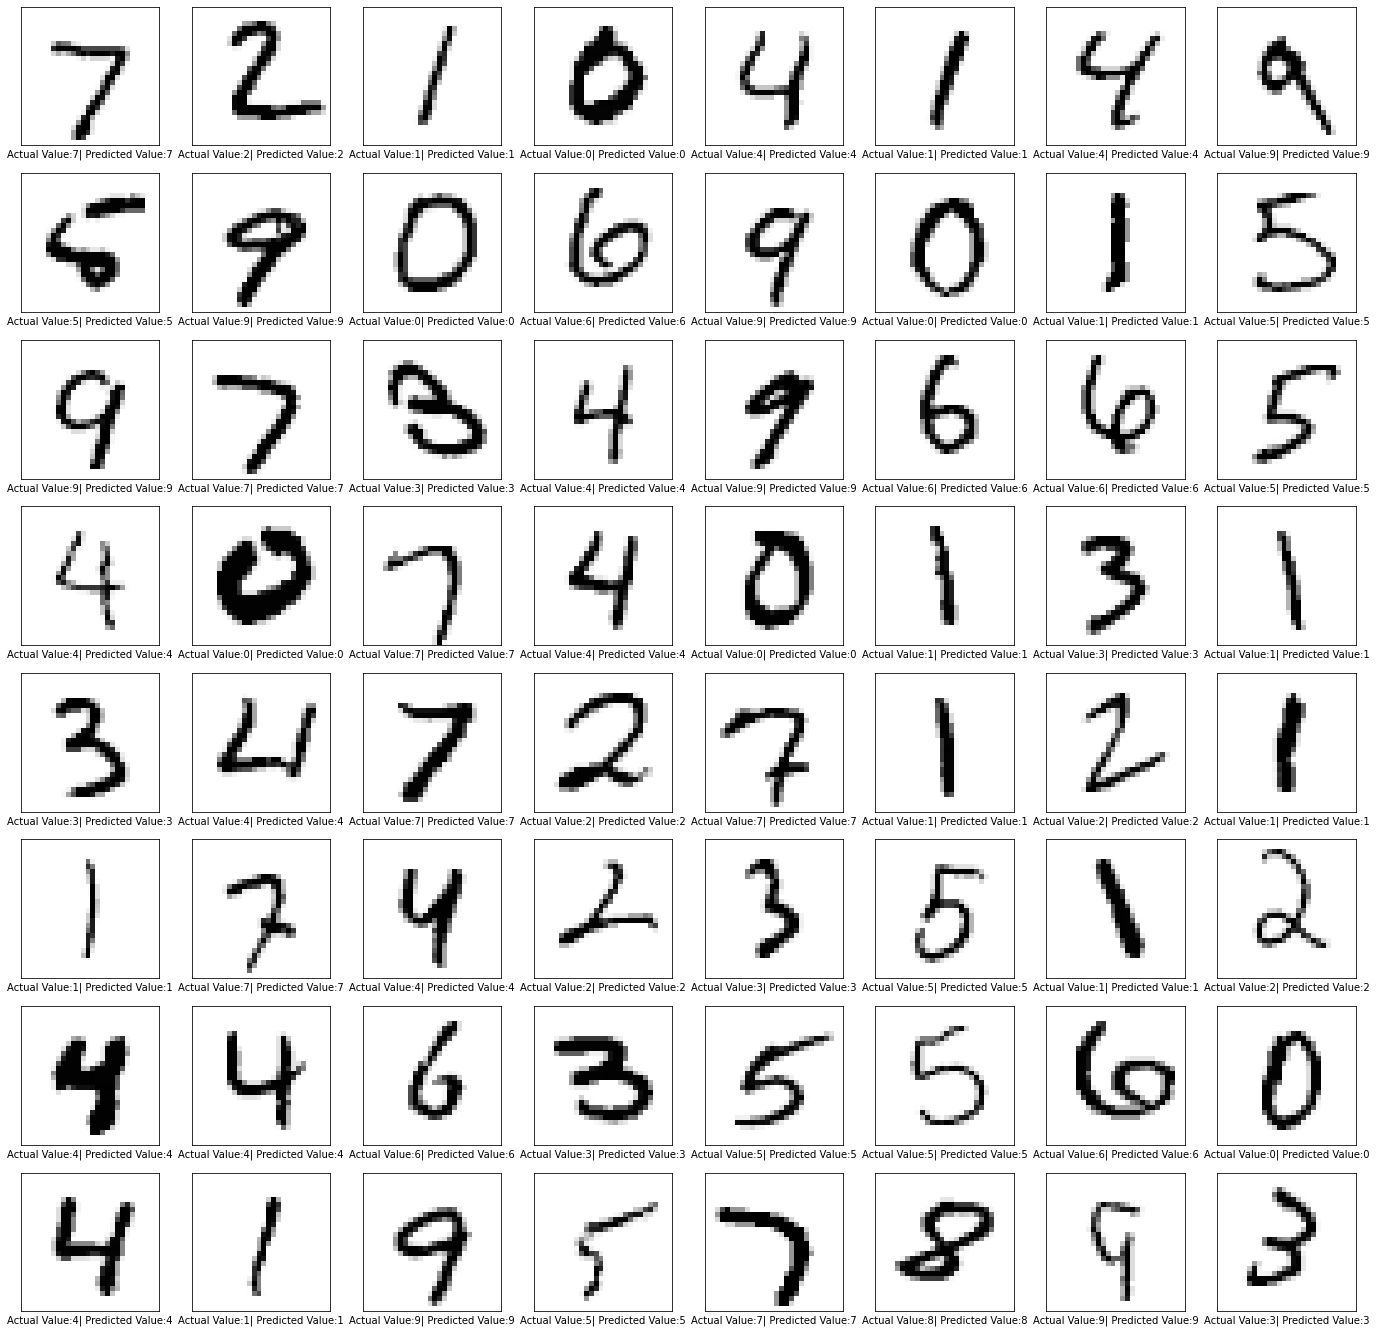

In [39]:
plt.figure(figsize=(24,24))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap=plt.cm.Greys)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"Actual Value:{y_test[i]}| Predicted Value:{np.argmax(predictions[i])}")